### Vérifier le bon téléchargement du dataset

In [10]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

root = "20bn-jester-v1"   # Modifie si ton dossier s'appelle différemment
dirs = [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]

print("Nombre de dossiers trouvés :", len(dirs))
print("Exemples :", dirs[:10])


Nombre de dossiers trouvés : 148092
Exemples : ['85648', '75617', '104170', '91491', '8032', '59505', '229', '59256', '138194', '135254']


### Nettoyer le fichier .csv de label 

<Axes: xlabel='label'>

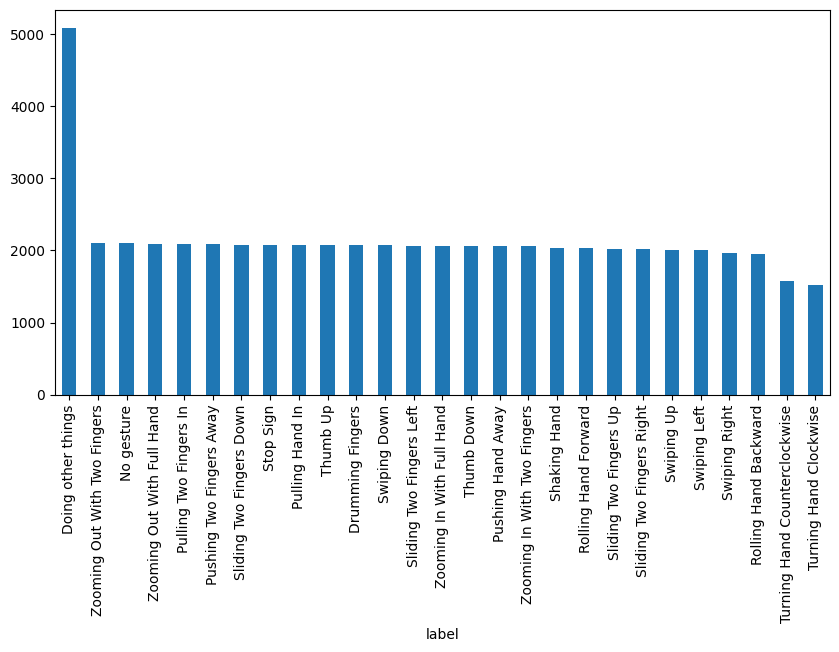

In [11]:
df = pd.read_csv("jester_labels_all.csv")
df["video_id"] = pd.to_numeric(df["video_id"], errors="coerce")
df = df[df["video_id"].notna()]

df["label_id"] = pd.to_numeric(df["label_id"], errors="coerce")
df = df[df["label_id"].notna()]


df["video_id"] = df["video_id"].astype(int)
df["label_id"] = df["label_id"].astype(int)

df.label.value_counts().plot(kind='bar', figsize=(10,5))



### Classer les différentes frames par label

In [ ]:
root = "20bn-jester-v1"  # dossier contenant les vidéos extractées
out_root = "Jester_filtered_gestures"

Convert frames .png to video .mp4

In [30]:
def frames_folder_to_video(src_folder, out_path, fps=12):
    """
    Construit une vidéo MP4 à partir des frames présentes dans src_folder.
    La vidéo est sauvegardée dans out_path.
    """
    if not os.path.isdir(src_folder):
        raise FileNotFoundError(f"Folder not found: {src_folder}")

    frames = sorted(f for f in os.listdir(src_folder) if f.endswith(".jpg"))
    if len(frames) == 0:
        raise ValueError(f"No frames found in {src_folder}")

    # Taille vidéo via la première frame
    first_frame = cv2.imread(os.path.join(src_folder, frames[0]))
    h, w, _ = first_frame.shape

    writer = cv2.VideoWriter(out_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))
    for fname in frames:
        frame = cv2.imread(os.path.join(src_folder, fname))
        writer.write(frame)
    writer.release()

In [31]:
def export_videos_by_label(df, root, out_root, limit=None, fps=12):
    """
    Pour chaque ligne de df:
      - lit les frames dans root/<video_id>
      - reconstruit la vidéo en .mp4
      - sauvegarde dans out_root/<label>/<video_id>.mp4
    Aucun frame n'est copié dans les nouveaux dossiers.
    """
    rows = df if limit is None else df.head(limit)

    for _, row in rows.iterrows():
        vid = int(row["video_id"])
        label = str(row["label"]).strip()

        src_folder = os.path.join(root, str(vid))
        dst_folder = os.path.join(out_root, label)
        os.makedirs(dst_folder, exist_ok=True)

        out_video_path = os.path.join(dst_folder, f"{vid}.mp4")

        # Évite de recalculer si la vidéo existe déjà
        if os.path.exists(out_video_path):
            print(f"⏩ Skipping {vid}, already exists")
            continue

        try:
            frames_folder_to_video(src_folder, out_video_path, fps=fps)
            print(f"🎬 Created {out_video_path}")
        except Exception as e:
            print(f"❌ Error for video {vid}: {e}")


In [33]:
export_videos_by_label(df, root, out_root, fps=12)

⏩ Skipping 1, already exists
⏩ Skipping 3, already exists
⏩ Skipping 6, already exists
⏩ Skipping 11, already exists
⏩ Skipping 14, already exists
⏩ Skipping 17, already exists
⏩ Skipping 20, already exists
⏩ Skipping 28, already exists
⏩ Skipping 31, already exists
⏩ Skipping 34, already exists
⏩ Skipping 36, already exists
⏩ Skipping 37, already exists
⏩ Skipping 41, already exists
⏩ Skipping 42, already exists
⏩ Skipping 46, already exists
⏩ Skipping 50, already exists
⏩ Skipping 51, already exists
⏩ Skipping 55, already exists
⏩ Skipping 56, already exists
⏩ Skipping 58, already exists
🎬 Created Jester_filtered_gestures/Stop Sign/59.mp4
🎬 Created Jester_filtered_gestures/Sliding Two Fingers Up/62.mp4
🎬 Created Jester_filtered_gestures/Zooming In With Two Fingers/66.mp4
🎬 Created Jester_filtered_gestures/Sliding Two Fingers Up/69.mp4
🎬 Created Jester_filtered_gestures/No gesture/70.mp4
🎬 Created Jester_filtered_gestures/Pulling Two Fingers In/72.mp4
🎬 Created Jester_filtered_gesture